Introduction (Case Study - Enron Corporation)

The story of Enron Corporation was a series of event that resulted in the dizzying fall of one of the largest energy and commoditie companies in the United States. It affected over thousands of employees and shook the very core of Wall Street. With assets over USD60 billion dollars in value; its shares were once worth USD $90, but by the end of the saga it was only worth 26 cents and finally one of the biggest bankruptcy in history of the United States.  

To this day, it's still a wonder how the management of Enron manage to fool federal regulators with fabricating records and undisclosed accounting to defraud shareholders. This has resulted in much debate leading to changes to financial legislation and long-lasting repercussion to the industry as a whole.

In this case study, we will looking into 4 factors reguarding the company's internal communication:

- People involved
- Content of Emails
- Timeline and frequency emails
- And Subject of communciation

Package Used in Case Study:

Numpy     - Scientific computing ,
Pandas    - Data cleaning and data wrangling , 
RE        - Regular expressions ,
Nltk      - Text analyzation ,
Seaborn   - Statistical graphics ,
Matlotlib - Statistical graphics ,

In [1]:
import numpy as np
import pandas as pd
import re
import nltk
import seaborn as sns; sns.set_style('whitegrid')
nltk.download('punkt')
nltk.download('stopwords')
import matplotlib.pyplot as plt
#!pip install wordcloud


df1 = pd.read_csv(r"C:\Users\wilson\Dataset\enron_emails05172015.csv", nrows=16000)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\wilson\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wilson\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


*Data wrangling - Removing/Cleaning messying or unwanted categories.

In [2]:
df1.columns

Index(['Unnamed: 0', 'Message-ID', 'Date', 'From', 'To', 'Subject', 'X-From',
       'X-To', 'X-cc', 'X-bcc', 'X-Folder', 'X-Origin', 'X-FileName',
       'content', 'user', 'Cat_1_level_1', 'Cat_1_level_2', 'Cat_1_weight',
       'Cat_2_level_1', 'Cat_2_level_2', 'Cat_2_weight', 'Cat_3_level_1',
       'Cat_3_level_2', 'Cat_3_weight', 'Cat_4_level_1', 'Cat_4_level_2',
       'Cat_4_weight', 'Cat_5_level_1', 'Cat_5_level_2', 'Cat_5_weight',
       'Cat_6_level_1', 'Cat_6_level_2', 'Cat_6_weight', 'Cat_7_level_1',
       'Cat_7_level_2', 'Cat_7_weight', 'Cat_8_level_1', 'Cat_8_level_2',
       'Cat_8_weight', 'Cat_9_level_1', 'Cat_9_level_2', 'Cat_9_weight',
       'Cat_10_level_1', 'Cat_10_level_2', 'Cat_10_weight', 'Cat_11_level_1',
       'Cat_11_level_2', 'Cat_11_weight', 'Cat_12_level_1', 'Cat_12_level_2',
       'Cat_12_weight', 'labeled'],
      dtype='object')

In [3]:
df1 = df1.drop(['Cat_1_level_1', 'Cat_1_level_2', 'Cat_1_weight',
       'Cat_2_level_1', 'Cat_2_level_2', 'Cat_2_weight', 'Cat_3_level_1',
       'Cat_3_level_2', 'Cat_3_weight', 'Cat_4_level_1', 'Cat_4_level_2',
       'Cat_4_weight', 'Cat_5_level_1', 'Cat_5_level_2', 'Cat_5_weight',
       'Cat_6_level_1', 'Cat_6_level_2', 'Cat_6_weight', 'Cat_7_level_1',
       'Cat_7_level_2', 'Cat_7_weight', 'Cat_8_level_1', 'Cat_8_level_2',
       'Cat_8_weight', 'Cat_9_level_1', 'Cat_9_level_2', 'Cat_9_weight',
       'Cat_10_level_1', 'Cat_10_level_2', 'Cat_10_weight', 'Cat_11_level_1',
       'Cat_11_level_2', 'Cat_11_weight', 'Cat_12_level_1', 'Cat_12_level_2',
       'Cat_12_weight', 'labeled'], axis=1)
print(df1.columns)

Index(['Unnamed: 0', 'Message-ID', 'Date', 'From', 'To', 'Subject', 'X-From',
       'X-To', 'X-cc', 'X-bcc', 'X-Folder', 'X-Origin', 'X-FileName',
       'content', 'user'],
      dtype='object')


In [4]:
df1 = df1.drop(['Unnamed: 0', 'Message-ID', 'From', 'To', 'X-From',
       'X-To', 'X-cc', 'X-bcc', 'X-Folder', 'X-Origin', 'X-FileName'], axis=1)
print(df1.columns)

Index(['Date', 'Subject', 'content', 'user'], dtype='object')


*Adding Time/Dateline for Statistical graphics

In [17]:
df1['Date'] = pd.to_datetime(df1['Date'], infer_datetime_format=True)
df1.dtypes


KeyError: 'Date'

Exploratory analyses

*The graphs show the frequency and period, emails were sent over the course of the case.

Text(0, 0.5, 'N emails')

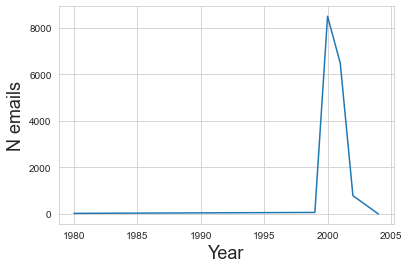

In [6]:

ax = df1.groupby(df1['Date'].dt.year)['content'].count().plot()
ax.set_xlabel('Year', fontsize=18)
ax.set_ylabel('N emails', fontsize=18)

Text(0, 0.5, 'N emails')

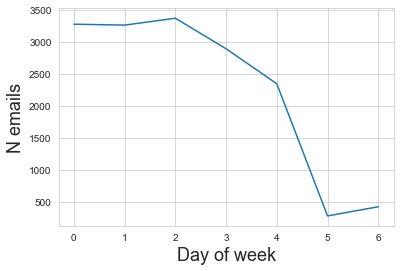

In [7]:
ax = df1.groupby(df1['Date'].dt.dayofweek)['content'].count().plot()
ax.set_xlabel('Day of week', fontsize=18)
ax.set_ylabel('N emails', fontsize=18)

Text(0, 0.5, 'N emails')

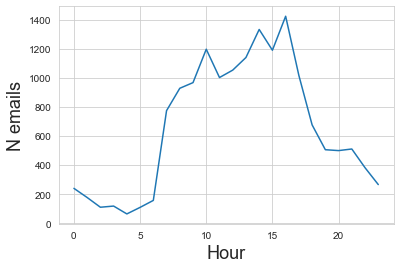

In [8]:
ax = df1.groupby(df1['Date'].dt.hour)['content'].count().plot()
ax.set_xlabel('Hour', fontsize=18)
ax.set_ylabel('N emails', fontsize=18)

*Users who were strongly involved and have sent the most emails.

In [9]:
grouped_by_people = df1.groupby('user').agg({'content': 'count'})
grouped_by_people.rename(columns={'content': 'N emails'}).head()

,N emails
user,
allen-p,3023
arnold-j,4881
arora-h,654
badeer-r,874
bailey-s,478


#### - Visualization 
- Word Cloud 
- sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS

#### - Highest Frequency to Lowest Frequency

C:\Users\wilson\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


(-0.5, 799.5, 599.5, -0.5)

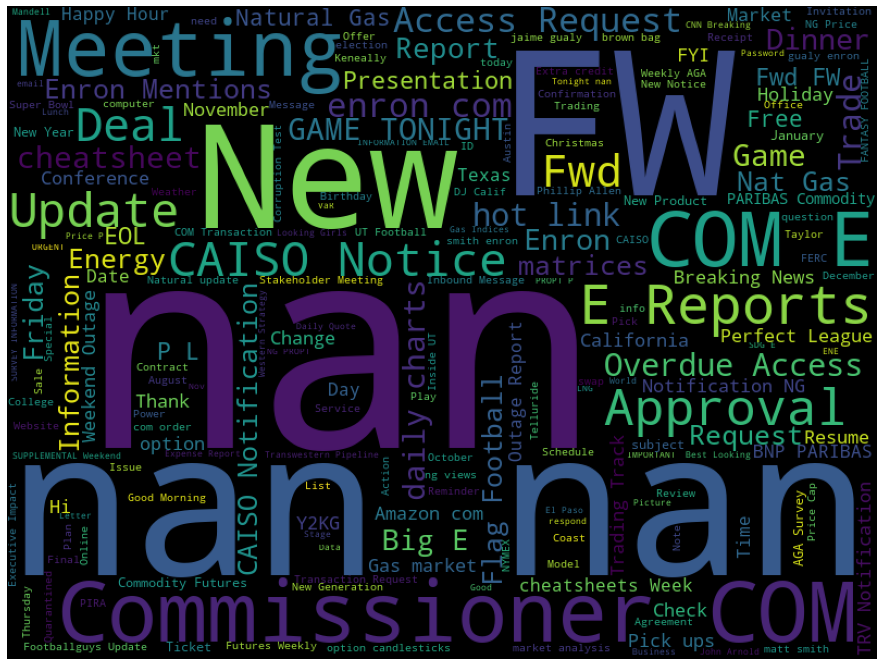

In [10]:
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from wordcloud import WordCloud
subjects = ' '.join([str(text) for text in df1['Subject']])
fig, ax = plt.subplots(figsize=(16, 12))
wc =   WordCloud(width=800, height=600, max_words=200, stopwords=ENGLISH_STOP_WORDS).generate(subjects)
ax.imshow(wc)
ax.axis("off")

#### - Removing unnecessary columns

In [11]:
df1 = df1.drop(['Date', 'Subject', 'user'], axis=1)
df1.columns

Index(['content'], dtype='object')

#### - Running a sample size of *1000 rows*

In [12]:
# df2 = df1.iloc[0:1000]
df2 = df1
# print(df2)

#### - Creating new column 'clean_content'

#### - 3 Steps Removal 
1. Unnecessary Character (ie NOT 'a'-'z', 'A'-'Z')
2. Converting to lowercase ('A' to 'a')
3. Removing any word which is lesser than 3 alphabets

#### - Remove **'content'**

In [13]:
pd.options.mode.chained_assignment = None  # default='warn'

df2['clean_content'] = df2['content'].str.replace("[^a-zA-Z#]", " ")

df2['clean_content'] = df2['clean_content'].str.lower()

df2['clean_content'] = df2['clean_content'].apply(lambda x: ' '.join([w for w in str(x).split() if len(w)>3]))



df2 = df2.drop(['content'], axis=1)
df2.columns
df2.head()



<ipython-input-13-46bc7b1cfac1>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df2['clean_content'] = df2['content'].str.replace("[^a-zA-Z#]", " ")


,clean_content
0,here forecast
1,traveling have business meeting takes trip esp...
2,test successful
3,randy send schedule salary level everyone sche...
4,shoot tuesday


#### - Splitting up text into smaller individual word

In [14]:
tokenized_content = df2['clean_content'].apply(lambda x: str(x).split())

# print(tokenized_content)


#### - Creating a new list **'tokens'**
#### - Running a for loop to add in words from **'tokenized_content'** to **'tokens'**

In [15]:
tokens = []

for word in tokenized_content:
    tokens.append(word)

# print(tokens)

#### - Converting **'tokens'** list into string
#### - Running through 'word_tokenize' package from NLTK. Tokenizing each word.
#### - Removing stopwords from **'useful_words'**
#### - stopwords -->
{'her', 'wouldn', 'here', 'down', "aren't", 'did', 'how', "you've", 'into', 'once', "should've", "doesn't", 'wasn', 'his', 'don', 'not', 'she', 'other', 'or', 'until', 'their', 'some', 'at', 'were', 'was', 'through', 'who', "weren't", 'those', 'now', 'when', 'my', "she's", 'all', 'our', 'theirs', 'can', 'yourselves', 'whom', 'up', 'does', "haven't", 'himself', 'having', "won't", 'hers', 'are', 're', 'on', 'very', 'is', 'shouldn', 'most', "don't", 'more', 'been', "didn't", 'be', 'he', 'just', 'mustn', 'had', 'each', "it's", 'against', 'no', 'didn', 'isn', 'ain', "you'll", 'over', 'then', 'hadn', 'above', 'in', 'of', "isn't", 'same', 'a', 'for', 'by', 'i', 'any', 'ourselves', 'do', 'during', 'under', 'haven', 'being', 'both', "shan't", "wasn't", 'won', "that'll", 'itself', 'about', "you're", 've', 'that', 'shan', 'what', 'off', 'to', 'yourself', "wouldn't", "hadn't", 'yours', 'has', 'have', 'own', 'mightn', 'm', "mightn't", 'ours', 'them', 'these', 'should', 'couldn', 'its', "needn't", 't', 'with', "hasn't", 'between', 'before', 'from', "shouldn't", 'him', 'only', 'aren', 'o', 'themselves', 'am', 'because', 'this', 'the', 'doesn', 'if', 'myself', 'which', 'will', 'they', 'your', 'it', 'few', 'ma', 'weren', 'herself', 'out', 'me', 'and', 'again', 'hasn', 'll', 'we', 'd', 'further', "mustn't", 'as', 'than', "couldn't", 'doing', 'so', 'below', 'why', 'where', 'nor', "you'd", 'an', 'after', 'y', 'such', 'you', 'there', 's', 'while', 'needn', 'too', 'but'}

#### - Once tokenized, run a list comprehension to check for the stopwords in the tokens. stop words removed and remainder words gets added back to variable

In [16]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# stop_words=set(stopwords.words("English"))
# print(stop_words)

tokens = str(tokens)

words = word_tokenize(tokens)
#print(words)

useful_words = [word for word in words if word not in stopwords.words('English')]

# print(useful_words)

#### - Removing of punctuation from **'removed'**
#### - Showcase of 500 most common words

In [18]:
import string
# print(useful_words)
removed = [t for t in useful_words if t not in string.punctuation]

# print(removed)

frequency = nltk.FreqDist(removed)

# print(removed)
print(frequency.most_common(500))

[("'enron", 43385), ("'this", 28287), ("'that", 27757), ("'from", 25708), ("'font", 24052), ("'with", 22564), ("'will", 21424), ("'have", 19267), ("'your", 17823), ("'subject", 13760), ("'align", 10440), ("'size", 9757), ("'please", 9493), ("'week", 9424), ("'john", 8851), ("'right", 8844), ("'bass", 8539), ("'would", 8114), ("'game", 8074), ("'they", 8033), ("'eric", 8027), ("'more", 7843), ("'class", 7843), ("'time", 7263), ("'corp", 7240), ("'about", 7214), ("'message", 6660), ("'what", 6627), ("'said", 6590), ("'image", 6526), ("'been", 6452), ("'last", 5896), ("'mail", 5702), ("'year", 5699), ("'know", 5612), ("'updated", 5580), ("'sent", 5498), ("'free", 5487), ("'company", 5484), ("'there", 5370), ("'like", 5321), ("'some", 5135), ("'just", 5127), ("'here", 5030), ("'when", 4971), ("'arnold", 4906), ("'against", 4783), ("'original", 4712), ("'which", 4618), ("'their", 4608), ("'power", 4568), ("'only", 4557), ("'market", 4555), ("'these", 4521), ("'over", 4453), ("'phillip", 443

#### - Removing *(apostrophe)*--> ' <-- from ("   *'enron*   ", 3215)
#### - Enhancing the removal of stopwords
#### - Created a new list **'filtered_sentence'**
#### - For loop to add only *non-stopwords* into new list
#### - Doing a count of which words appearing the most in the emails

In [19]:
removed = ' '.join(removed).replace("'",'').split()


# from nltk.corpus import stopwords
stop_words=set(stopwords.words("English"))


filtered_sentence=[]
for w in removed:
    if w not in stop_words:
        filtered_sentence.append(w)
# print("Tokenized Sentence:",removed)
# print("Filtered Sentence:",filtered_sentence)

# print(removed)
# print(filtered_sentence)

frequency = nltk.FreqDist(filtered_sentence)

print(frequency.most_common(500))

[('enron', 43385), ('font', 24052), ('subject', 13760), ('align', 10440), ('size', 9757), ('please', 9493), ('week', 9424), ('john', 8851), ('right', 8844), ('bass', 8539), ('would', 8114), ('game', 8074), ('eric', 8027), ('class', 7843), ('time', 7263), ('corp', 7240), ('message', 6660), ('said', 6590), ('image', 6526), ('last', 5896), ('mail', 5702), ('year', 5699), ('know', 5612), ('updated', 5580), ('sent', 5498), ('free', 5487), ('company', 5484), ('like', 5321), ('arnold', 4906), ('original', 4712), ('power', 4568), ('market', 4555), ('phillip', 4430), ('energy', 4301), ('email', 4257), ('back', 4151), ('could', 4119), ('good', 4085), ('team', 4013), ('need', 3995), ('forwarded', 3994), ('information', 3985), ('face', 3960), ('also', 3956), ('fantasy', 3845), ('price', 3736), ('think', 3726), ('call', 3721), ('thanks', 3717), ('play', 3656), ('make', 3627), ('allen', 3615), ('arial', 3591), ('sunday', 3510), ('season', 3394), ('left', 3383), ('start', 3363), ('houston', 3349), ('

#### - 3 Category of dictionary **(Financial, Personnel & Property)**
#### - New function **'word_count'**
#### - Counting appearance of each word in **dictionary**

In [26]:
financial_dict = { 'market':0, 'price':0,'trading':0, 'cost':0, 'cash':0,'investment':0, 'trades':0,'analyst':0, 'equity':0,'loan':0, 'legal':0,'funds':0, 'gift':0, 'investor': 0, 'profit':0,'financing':0, 'expenses':0,  'audit':0, 'incentive':0}

personnel_dict = {'john':0,'phillip':0, 'allen':0,  'jeff':0,'smith':0,'mark':0,  'mike':0,'george':0,'steve': 0, 'scott':0, 'larry':0,  'austin':0,'richard':0,  'keith':0,  'lucy':0 }

property_dict = {  'site':0,'city':0,'development':0, 'utilities':0,'storage': 0,'land':0,'construction':0,'property':0,'rental':0, 'rent':0,'region':0, 'design':0, 'builders':0, 'rentroll':0, 'engineer':0}

    
def word_count():
    
    for word in filtered_sentence:
        if word in financial_dict:
            financial_dict[word] += 1
        elif word in personnel_dict:
            personnel_dict[word] += 1
        elif word in property_dict:
            property_dict[word] += 1    
        else:
            continue
    return


word_count()
print('\n')
print("Financial related terms -->", financial_dict)
print('\n')
print("Personnel names -->", personnel_dict)
print('\n')
print("Property related terms -->", property_dict)
print('\n')



Financial related terms --> {'market': 4555, 'price': 3736, 'trading': 3045, 'cost': 1357, 'cash': 1319, 'investment': 998, 'trades': 840, 'analyst': 798, 'equity': 734, 'loan': 672, 'legal': 566, 'funds': 547, 'gift': 500, 'investor': 494, 'profit': 431, 'financing': 291, 'expenses': 203, 'audit': 82, 'incentive': 55}


Personnel names --> {'john': 8851, 'phillip': 4430, 'allen': 3615, 'jeff': 2422, 'smith': 2343, 'mark': 1927, 'mike': 1909, 'george': 1754, 'steve': 1384, 'scott': 1222, 'larry': 1067, 'austin': 778, 'richard': 715, 'keith': 441, 'lucy': 255}


Property related terms --> {'site': 1680, 'city': 1575, 'development': 825, 'utilities': 769, 'storage': 643, 'land': 515, 'construction': 494, 'property': 493, 'rental': 449, 'rent': 357, 'region': 331, 'design': 318, 'builders': 156, 'rentroll': 155, 'engineer': 112}




## Summary

Our case present the intensity frequency and people involve in Enron Corporation Scandal over the period of '31st August 2000 till 8th December 2000'.
Though we found some groups behaving similarly, we realised a number of emails were flagged because of consistent usage of words like 'gift' 'audit' 'incentive' 'cash' 'legal'. It had turn out to be inconclusive in summarizing systemic corruption behavior in the organization. As the words found from our analysis were not a strong enough indication of corrupted behavior. Thus we conclude based on our analysis that the major players involve were highly cautious and merticulous in ensuring that possible legal ratification will not be turn to them when investigated by the federal government. Thus proving the ability and commitment of the higher management in enron corp to evade detection, resulting in the lack of oversight by federal regulators and leading to one of the largest financial catastrophe in US history.

Despite the dataset problem, we were able to narrow down the key players involve in the corruption and abused of power within the organization.
In summary, though Enron was involve in the biggest scandal in US history there was a proper and planned scheme behind the email conversation. 
Thus law enforcement agencies werent able to pick up the case earlier and resulted in the saga of Enron Corp.